In [1]:
%pylab inline
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 25,10;
sns.set_context('poster',font_scale=1.4);
import pandas as pd;
from collections import namedtuple
from pprint import pprint;
import sys;
from copy import deepcopy;
import pickle;
import pyccl as ccl
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr
from itertools import permutations
sns.set_context('paper')
params = ['omega_m', 'omega_b', 'h', 'sigma_8', 'n_s', 'w_0', 'w_a']
a = np.array(list(permutations(params, 2)))
a = a.reshape(7, 7-1, 2)
from collections import OrderedDict
from itertools import combinations
import plotly.express as px
from itertools import permutations

Populating the interactive namespace from numpy and matplotlib


In [2]:
%reload_ext autoreload
%autoreload 2
from fisher import Fisher, FullPlot, marginalize, plot_contours

In [4]:
cosmo = ccl.Cosmology(Omega_c=0.2666, 
                       Omega_b=0.049, 
                       h=0.6727, 
                       sigma8=0.831, 
                       n_s=0.9645, 
                       transfer_function='eisenstein_hu', )

In [19]:

obj = Fisher(cosmo, end=7+15+4, probe='ss')

In [ ]:
obj.process()


Getting Ells
Getting covariance matrix
Getting derivatives
omega_m
sigma_8


In [25]:
biased = Fisher(cosmo, end=7+15+4, probe='ss')
biased.process()

Getting Ells
Getting covariance matrix
Getting derivatives
omega_m
sigma_8
n_s
w_0
w_a
omega_b
h
A0
beta
etal
etah
zbias1
zbias2
zbias3
zbias4
zbias5
zvariance1
zvariance2
zvariance3
zvariance4
zvariance5
zoutlier1
zoutlier2
zoutlier3
zoutlier4
zoutlier5
Building fisher matrix
Done


In [6]:
d = {'ss': 'sl+ll',
     'sl': 'ss+ll',
     'll': 'ss+sl'}
for k, v in list(d.items()):
    d[v] = k
fishers = {}
fishers['fid'] = obj.fisher
for exclusions in [['ss'], ['sl'], ['ll'], ['ss', 'sl'], ['ss', 'll'], ['sl', 'll']]:
    obj.masked = exclusions
    fishers['+'.join(exclusions)] = obj.getFisher()

AttributeError: 'Fisher' object has no attribute 'fisher'

In [10]:
lims = {
    'omega_m': (0.2, 0.4),
    'omega_b': (0.035, 0.065),
    'sigma_8': (0.72, 0.93),
    'h':(0.45, 0.74),
    'n_s': (0.85, 1.06),
    'w_0': (-2.1, 0.1),
    'w_a': (-3, 3)
}
def dif(c):
    a, b = c
    return b-a

In [9]:
for i in range(5):
    for j in range(i, 5):
        a = [1]*5
        a[i] = 0.8
        a[j] = 0.8
        print(a)

[0.8, 1, 1, 1, 1]
[0.8, 0.8, 1, 1, 1]
[0.8, 1, 0.8, 1, 1]
[0.8, 1, 1, 0.8, 1]
[0.8, 1, 1, 1, 0.8]
[1, 0.8, 1, 1, 1]
[1, 0.8, 0.8, 1, 1]
[1, 0.8, 1, 0.8, 1]
[1, 0.8, 1, 1, 0.8]
[1, 1, 0.8, 1, 1]
[1, 1, 0.8, 0.8, 1]
[1, 1, 0.8, 1, 0.8]
[1, 1, 1, 0.8, 1]
[1, 1, 1, 0.8, 0.8]
[1, 1, 1, 1, 0.8]


In [28]:
results = {}

In [ ]:
d = 

In [34]:
results = pickle.load(open('/global/cscratch1/sd/husni/active_subspaces.p', 'rb'))

In [30]:
for i in range(1, 6):
    for b in np.linspace(-0.1, 0.1, 41):
        print(i, b)
        biased.zbias[i] = b
        a = []
        biased._makeSourcePZ()
        c = biased.makeShearShearCells()
        a.append(c)
        biased.ccl_cls = np.vstack(tuple(a))
        biased.getDerivs(param=f'zbias{i+1}')
        #obj.fisher = obj.getFisher()
        #obj.has_run = True
        results[f'{i} {b}'] = (a, biased.derivs_sig['zbias'+str(i+1)], 0)
        pickle.dump(results, open('/global/cscratch1/sd/husni/active_subspaces2.p', 'wb'))

1 -0.1
Getting derivatives
zbias2


KeyboardInterrupt: 

In [35]:
grads = []
grads.append([[centroid_shift_d(obj, results[f'{i} {d}'][1].flatten())['w_0'] for d in np.linspace(-0.1, 0.1, 41)] for i in range(5)])

In [36]:
C = np.array([np.outer(a, a) for a in np.array(grads).T])

In [37]:
C = np.mean(C, axis=0)

In [ ]:
np.linalg.eig(C)

In [38]:
np.linalg.eig(C)

(array([0.16524435, 0.15677568, 0.00068944, 0.00035956, 0.00023787]),
 array([[-0.64377128, -0.31589737,  0.61758959,  0.32302075,  0.00284421],
        [ 0.62931613,  0.23411304,  0.48231231,  0.56059929,  0.0474928 ],
        [ 0.36995287, -0.91761732, -0.12300129,  0.0752504 , -0.01792708],
        [ 0.22941226, -0.04957123,  0.60872169, -0.75446008, -0.07183731],
        [-0.00496369, -0.03034923,  0.01692664, -0.0807057 ,  0.99611965]]))

In [16]:
class Wrapper:
    def __init__(self, ccl_cls):
        self.ccl_cls = ccl_cls

In [53]:
np.linalg.eig(C)

(array([2.87209625e+00, 3.16233738e-01, 4.38157217e-03, 8.74856650e-04,
        5.47005956e-04]),
 array([[ 0.8052907 ,  0.21202951, -0.45237918, -0.31055085,  0.07390275],
        [-0.36836374,  0.90771298, -0.19430615, -0.05034663,  0.00869671],
        [-0.42540512, -0.3561705 , -0.81817961, -0.14309164,  0.04774908],
        [ 0.1864793 ,  0.06451381, -0.29692448,  0.90379624, -0.23675228],
        [ 0.00842598,  0.00900938,  0.00402223,  0.25238962,  0.9675387 ]]))

In [51]:
eigvect = [list(a) for a in np.linalg.eig(C)[1]]

In [59]:
perms = eigvect + [[1/np.sqrt(5)]*5]

In [55]:
perms

[[-0.6437712767229736,
  -0.31589736962952664,
  0.617589591009388,
  0.32302074647311446,
  0.002844213849861805],
 [0.6293161319041427,
  0.23411303895953262,
  0.4823123121357226,
  0.5605992853797241,
  0.0474927984895583],
 [0.36995286878189093,
  -0.9176173246412394,
  -0.1230012940123807,
  0.07525039506887667,
  -0.01792707760794372],
 [0.22941226225465444,
  -0.04957122766190983,
  0.6087216943777805,
  -0.7544600763731663,
  -0.07183731111437124],
 [-0.004963688037214351,
  -0.030349229918137315,
  0.01692663889476799,
  -0.08070569856378704,
  0.9961196540373564],
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579]

In [69]:
perms = []
for i in [-0.08, -0.04, 0.04, 0.08]:
    perms.extend(list(set(permutations([0]*5+[i]*5, 5))))

In [ ]:
Fisher.process??

Signature: Fisher.process(self)
Docstring: <no docstring>
Source:   
    def process(self):
        self._makeSourcePZ()
        self._makeLensPZ()
        self.getElls()
        self.ShearShearFid = self.makeShearShearCells()
        self.PosShearFid = self.makePosShearCells()
        self.PosPosFid = self.makePosPosCells()
        self.ccl_cls = np.vstack((self.ShearShearFid, self.PosShearFid, self.PosPosFid))
        self.buildCovMatrix()
        self.getDerivs()
        self.fisher = self.getFisher()
        self.has_run = True
        print('Done')
File:      /global/u2/h/husni/PZ_Project/fisher.py
Type:      function


In [11]:
def centroid_shift_d(unbiased, biased_cl_deriv):
    bias_vec = []
    for i, param in enumerate(unbiased.param_order[:-10]):
        bias_vec.append(biased_cl_deriv @
                unbiased.invcov @ unbiased.derivs_sig[param].flatten())
    bias_vec = np.array(bias_vec)
    para_bias = np.linalg.inv(unbiased.fisher).dot(bias_vec) 
    para_bias = {unbiased.param_order[i]: para_bias[i] for i in range(7)}
    return para_bias

In [12]:
def centroid_shift(unbiased, biased):
    cl_unbiased = unbiased.ccl_cls
    cl_biased = biased.ccl_cls
    
    diff_cl = (cl_biased - cl_unbiased).flatten()
    bias_vec = []
    for i, param in enumerate(unbiased.param_order[:-10]):
        bias_vec.append(diff_cl @
                unbiased.invcov @ unbiased.derivs_sig[param].flatten())
    bias_vec = np.array(bias_vec)
    para_bias = np.linalg.inv(unbiased.fisher).dot(bias_vec) 
    para_bias = {unbiased.param_order[i]: para_bias[i] for i in range(7)}
    return para_bias

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!$SCRATCH

/bin/bash: /global/cscratch1/sd/husni: Is a directory


In [24]:
pickle.dump(fishers, open('/global/cscratch1/sd/husni/fishers_var.p', 'wb'))
pickle.dump(shifts, open('/global/cscratch1/sd/husni/shifts_var.p', 'wb'))

In [13]:
fishers = pickle.load(open('/global/cscratch1/sd/husni/fishers_var.p', 'rb'))
shifts = pickle.load(open('/global/cscratch1/sd/husni/shifts_var.p', 'rb'))

In [28]:
fishers = {}
shifts = {}

In [ ]:
len(set(perms))

125

In [ ]:
results2 = {}

In [102]:

for perm in newperms:
    if perm not in shifts.keys() and Counter(perm)[0]<4:
        perms_used.append(perm)

In [70]:
perms += list(permutations([0, 0.8, 0.8, -0.08, 0.08])) + list(permutations([0,0.8,0.8,-0.8, -0.8])) + list(permutations([0, 0.8, -0.8, -0.8, -0.8]))

In [49]:
perm

[array([-0.64377128, -0.31589737,  0.61758959,  0.32302075,  0.00284421]),
 array([0.62931613, 0.23411304, 0.48231231, 0.56059929, 0.0474928 ]),
 array([ 0.36995287, -0.91761732, -0.12300129,  0.0752504 , -0.01792708]),
 array([ 0.22941226, -0.04957123,  0.60872169, -0.75446008, -0.07183731]),
 array([-0.00496369, -0.03034923,  0.01692664, -0.0807057 ,  0.99611965])]

In [66]:
nr = {}
for perm in perms:
    biased.zbias = perm
    a = []
    biased._makeSourcePZ()
    c = biased.makeShearShearCells()
    a.append(c)
    #biased.ccl_cls = np.vstack(tuple(a))
    nr[tuple(perm)] = (a, 0, 0)

In [85]:
for perm in perms:
    if perm not in results.keys():
        biased.zbias = perm
        a = []
        biased._makeSourcePZ()
        c = biased.makeShearShearCells()
        a.append(c)
        results[perm] = (a, 0, 0)
        pickle.dump(results, open('/global/cscratch1/sd/husni/shifts_bias2.p', 'wb'))

In [46]:
pickle.dump(results, open('/global/cscratch1/sd/husni/shifts_bias.p', 'wb'))

In [82]:
pickle.dump(shifts, open('/global/cscratch1/sd/husni/shifts_bias_w0.p', 'wb'))

In [14]:
shifts2 = {}
for k, v in shifts.items():
    shifts2[tuple(round(ki-1,2) for ki in k)] = v

In [ ]:
Wrapper(results[tuple(perms_used[0])])

In [67]:
shifts = {x: centroid_shift(obj, Wrapper(nr[tuple(x)][0]))['w_0'] for x in nr.keys()}

In [ ]:
shifts

{(-0.6437712767229736,
  -0.31589736962952664,
  0.617589591009388,
  0.32302074647311446,
  0.002844213849861805): 0.046891088570580663,
 (0.6293161319041427,
  0.23411303895953262,
  0.4823123121357226,
  0.5605992853797241,
  0.0474927984895583): 0.04371658679587176,
 (0.36995286878189093,
  -0.9176173246412394,
  -0.1230012940123807,
  0.07525039506887667,
  -0.01792707760794372): 0.01611001079665475,
 (0.22941226225465444,
  -0.04957122766190983,
  0.6087216943777805,
  -0.7544600763731663,
  -0.07183731111437124): -0.010487640752465666,
 (-0.004963688037214351,
  -0.030349229918137315,
  0.01692663889476799,
  -0.08070569856378704,
  0.9961196540373564): 0.00462923156161521,
 (0.4472135954999579,
  0.4472135954999579,
  0.4472135954999579,
  0.4472135954999579,
  0.4472135954999579): 0.04076524012782179}

In [83]:
resshifts = {x: centroid_shift(obj, Wrapper(results[tuple(x)][0]))['w_0'] for x in results.keys() if x in perms}

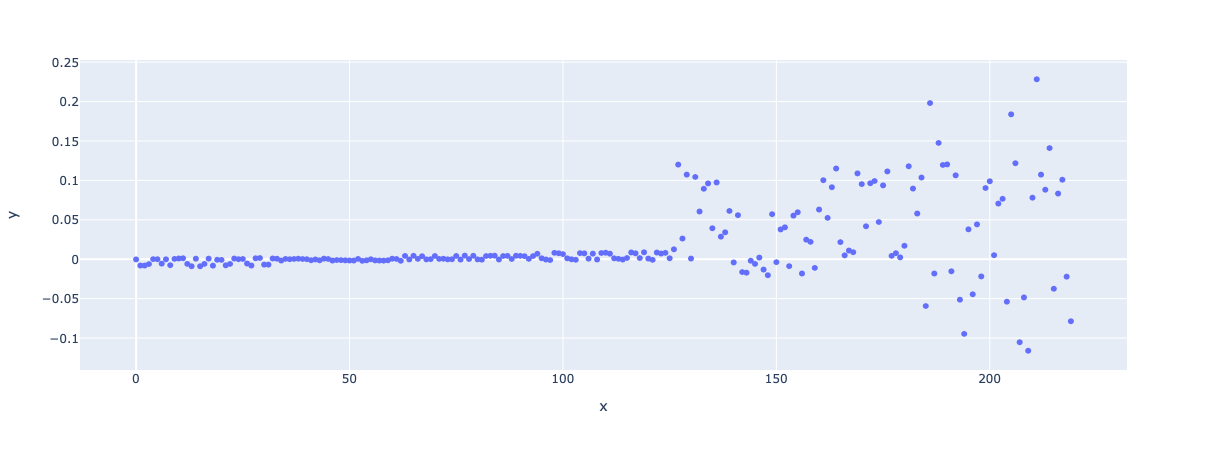

In [84]:

x = range(len(resshifts))
y = resshifts.values()
px.scatter(x=x, y=y, hover_name=[str(i) for i in resshifts.keys()])




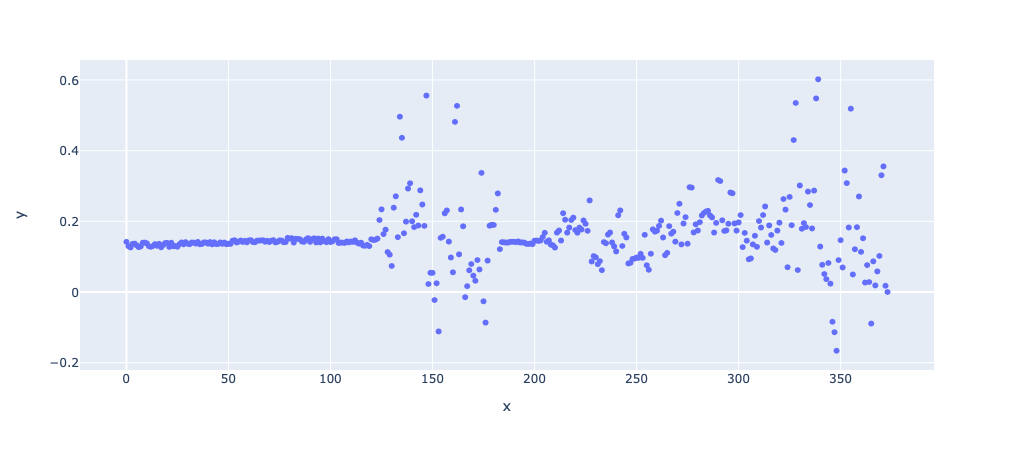

In [104]:

x = range(len(shifts))
y = shifts.values()
px.scatter(x=x, y=y, hover_name=[str(i) for i in shifts.keys()])



In [15]:
sumdict_outlier = OrderedDict()
for pair in combinations(list(shifts2.keys()), 2):
    if (s:=(tuple(pair[0][i] + pair[1][i] for i in range(5)))) in shifts2.keys():
        if sum(pair[0])*sum(pair[1])>=0:
            sumdict_outlier[pair] = {i:shifts2[s][i]/(shifts2[pair[0]][i]+shifts2[pair[1]][i]) for i in shifts2[s].keys()}

In [ ]:
params

['omega_m', 'omega_b', 'h', 'sigma_8', 'n_s', 'w_0', 'w_a']

fractional error for w_0 is 1.819761413875436


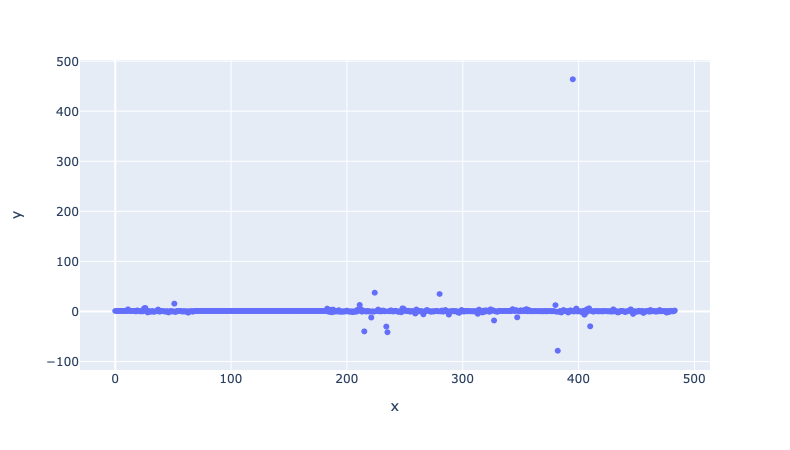

In [ ]:
param = params[5]
x = range(len(sumdict))
y = [v[param] for v in sumdict_outlier.values()]
print(f'fractional error for {param} is {(sum(abs(v)-1 for v in y)/len(sumdict))}')
px.scatter(x=x, y=y, hover_name=[str(i) for i in sumdict.keys()])



In [ ]:
for param in shifts[perm].keys():
    plt.figure()
    vals = []
    df = pd.DataFrame()
    for i, (k, v) in enumerate(shifts.items()):
        cur = pd.DataFrame({
            'var0': k[0],
            'var1': k[1],
            'var2': k[2],
            'var3': k[3],
            'var4': k[4],
            param: v[param]
        }, index=[i])
        df = pd.concat((df, cur))
        vals.append(v[param])
    ax = pd.plotting.parallel_coordinates(df, 
         param, colormap=plt.get_cmap('plasma'), 
         linewidth=3, alpha=0.1)
    f = ax.get_figure()
    plt.legend([])
    cmap = mpl.cm.plasma
    norm = mpl.colors.Normalize(vmin=min(vals), vmax=max(vals))
    plt.title(param)
    f.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))

In [ ]:
fish = pickle.load(open('variance_fishers.p','rb'))

In [ ]:
plot_contours??

Signature: plot_contours(matrix, sigmas, fid, **kwargs)
Docstring: <no docstring>
Source:   
def plot_contours(matrix, sigmas, fid, **kwargs):
    prefactor = {1:1.52, 2:2.48}
    prefactor = prefactor[sigmas]
    matrix = np.linalg.inv(matrix)
    s00, s01, s11 = matrix[0][0], matrix[0][1], matrix[1][1]
    a = np.sqrt(
        0.5*(s00 + s11) + np.sqrt(s01**2 + 0.25*(s00-s11)**2)
    )
    b = np.sqrt(
        0.5*(s00 + s11) - np.sqrt(s01**2 + 0.25*(s00-s11)**2)
    )
    b *= prefactor
    a *= prefactor
    theta = np.arctan(2*s01/(s00-s11))/2
    eig = np.linalg.eig(matrix)
    maxeig = eig[1][np.argmax(eig[0])]
    theta = np.arctan2(maxeig[1], maxeig[0])
    el = matplotlib.patches.Ellipse(fid, 2*a, 2*b, angle=-np.degrees(theta), alpha=0.3, **kwargs)
    return el, ((fid[0]-3*a*np.cos(theta), fid[0]+3*a*np.cos(theta)), (fid[1]-3*a*np.sin(theta), fid[1]+3*a*np.sin(theta)))
File:      /global/u2/h/husni/PZ_Project/fisher.py
Type:      function


In [98]:
def plot_contours(matrix, sigmas, fid, **kwargs):
    prefactor = {1:1.52, 2:2.48}
    prefactor = prefactor[sigmas]
    matrix = np.linalg.inv(matrix)
    s00, s01, s11 = matrix[0][0], matrix[0][1], matrix[1][1]
    a = np.sqrt(
        0.5*(s00 + s11) + np.sqrt(s01**2 + 0.25*(s00-s11)**2)
    )
    b = np.sqrt(
        0.5*(s00 + s11) - np.sqrt(s01**2 + 0.25*(s00-s11)**2)
    )
    b *= prefactor
    a *= prefactor
    theta = np.arctan(2*s01/(s00-s11))/2
    eig = np.linalg.eig(matrix)
    maxeig = eig[1][np.argmax(eig[0])]
    theta = np.arctan2(maxeig[1], maxeig[0])
    el = matplotlib.patches.Ellipse(fid, 2*a, 2*b, angle=-np.degrees(theta), alpha=0.3, **kwargs)
    xlim = np.sqrt(a**2*np.cos(theta)**2 + b**2*np.sin(theta)**2)
    ylim = np.sqrt(a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2)
    return el, ((fid[0]-xlim, fid[0]+xlim), (fid[1]-ylim, fid[1]+ylim))

In [ ]:
ylim

(-0.9400446949786541, 0.9400446949786541)

In [118]:
for params in [['w_0', 'w_a']]:
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for i, (k, v) in enumerate(fish.items()):
        fid=(arg.vals[params[0]], arg.vals[params[1]])
        e, (xlim, ylim) = plot_contours(
            marginalize(v['fisher'], 
                        arg.param_order.index(params[0]), 
                        arg.param_order.index(params[1])),
            sigmas=2, fid=fid
            )
        cur1 = pd.DataFrame({
            'var0': k[0],
            'var1': k[1],
            'var2': k[2],
            'var3': k[3],
            'var4': k[4],
            params[0]: xlim[1] - xlim[0]
        }, index=[i])
        df1 = pd.concat((df1, cur1))
        
        cur2 = pd.DataFrame({
            'var0': k[0],
            'var1': k[1],
            'var2': k[2],
            'var3': k[3],
            'var4': k[4],
            params[1]: ylim[1] - ylim[0]
        }, index=[i])
        df2 = pd.concat((df2, cur2))


    
    

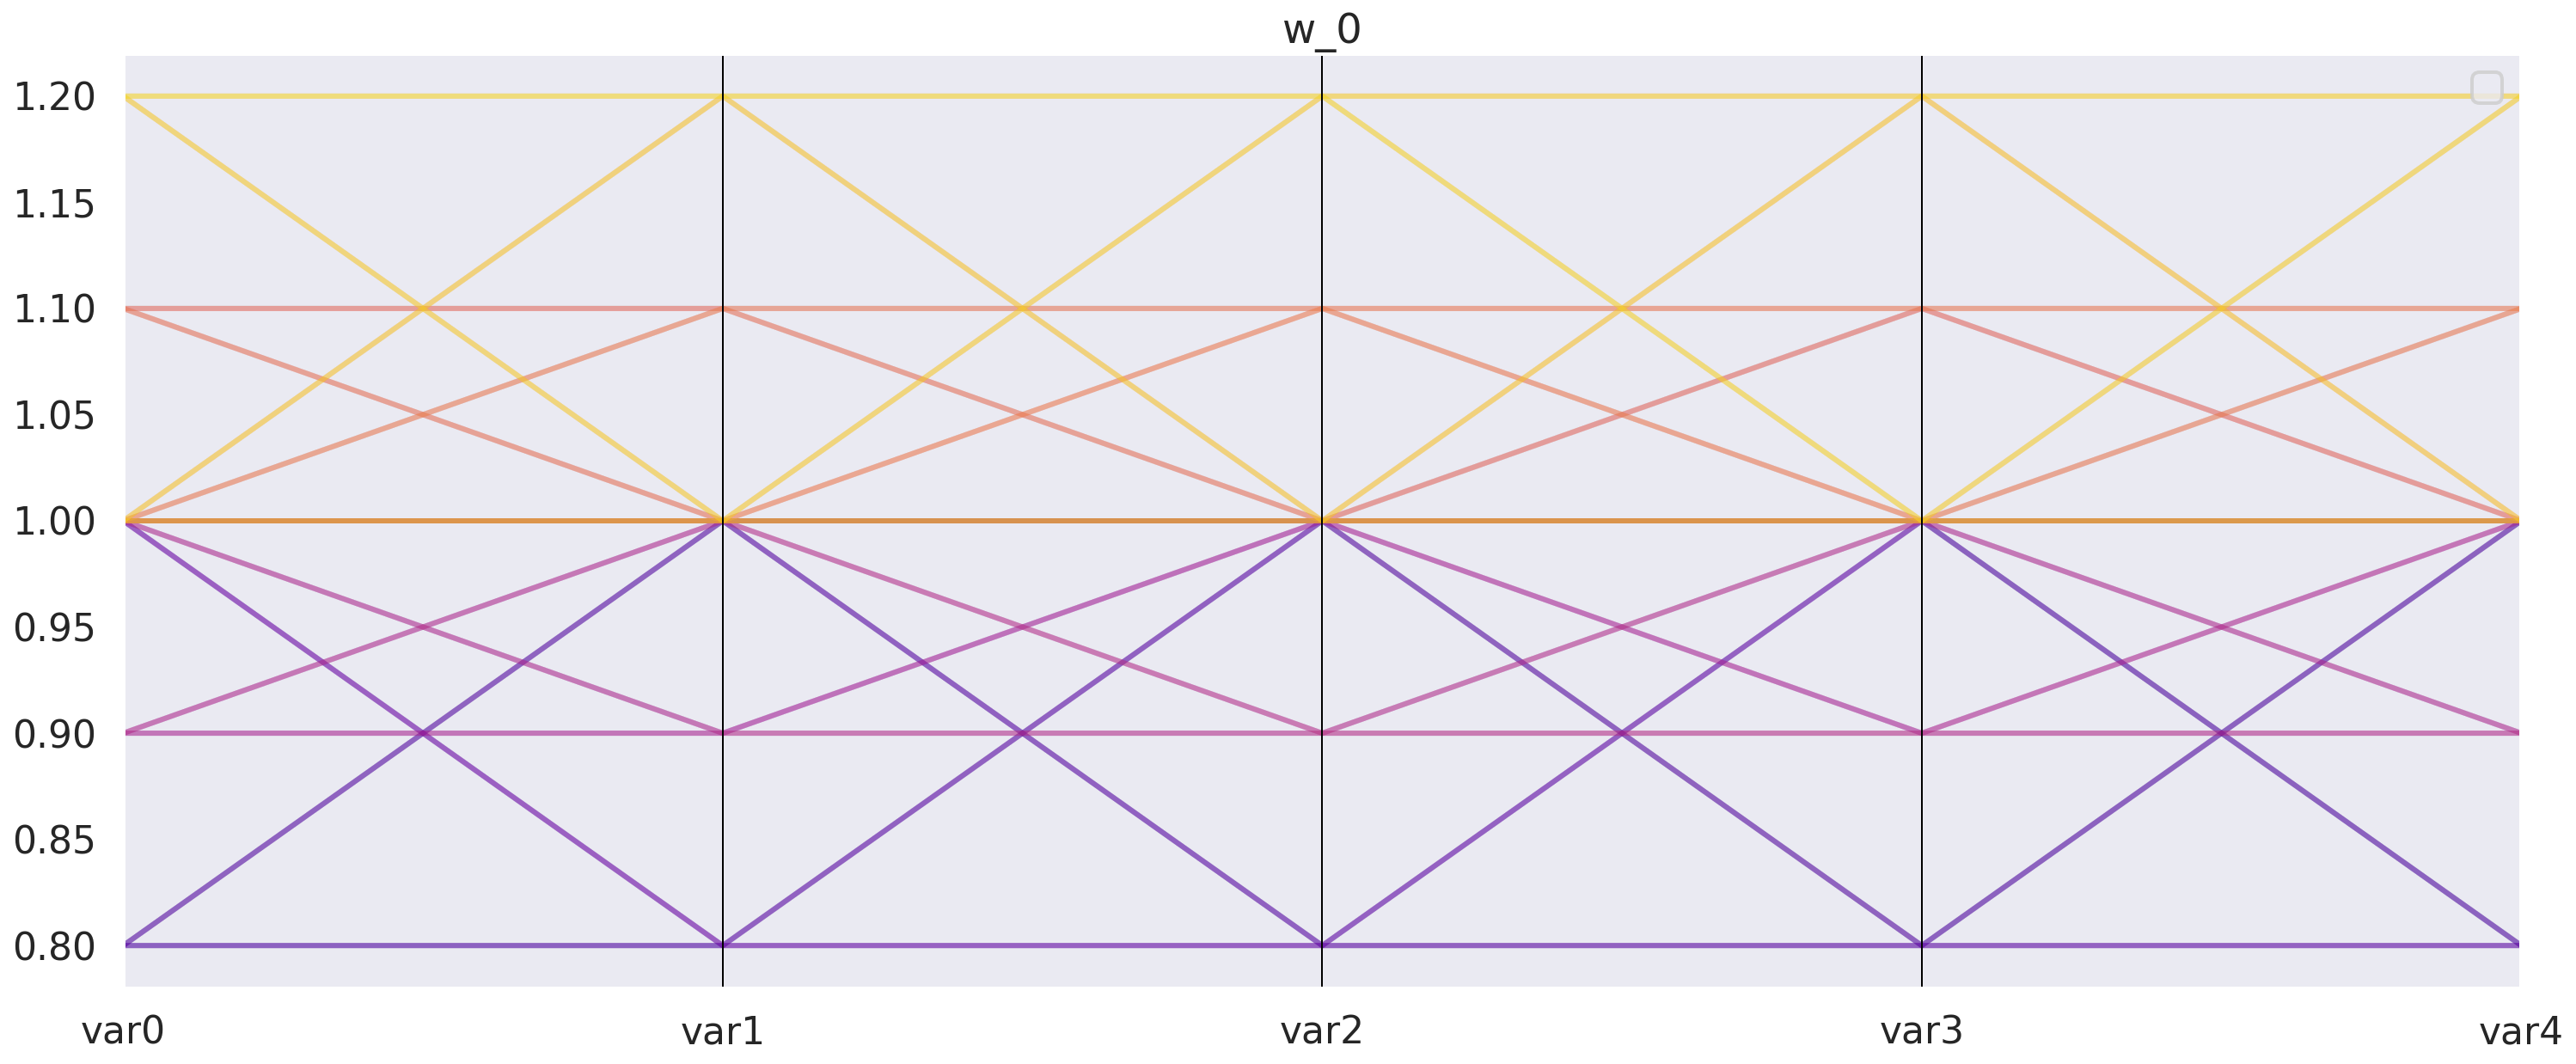

In [121]:
plt.figure()
plt.title('w_0')
ax = pd.plotting.parallel_coordinates(df1, 
 'w_0', colormap=plt.get_cmap('plasma'), 
 linewidth=3, alpha=0.1)
plt.legend([])



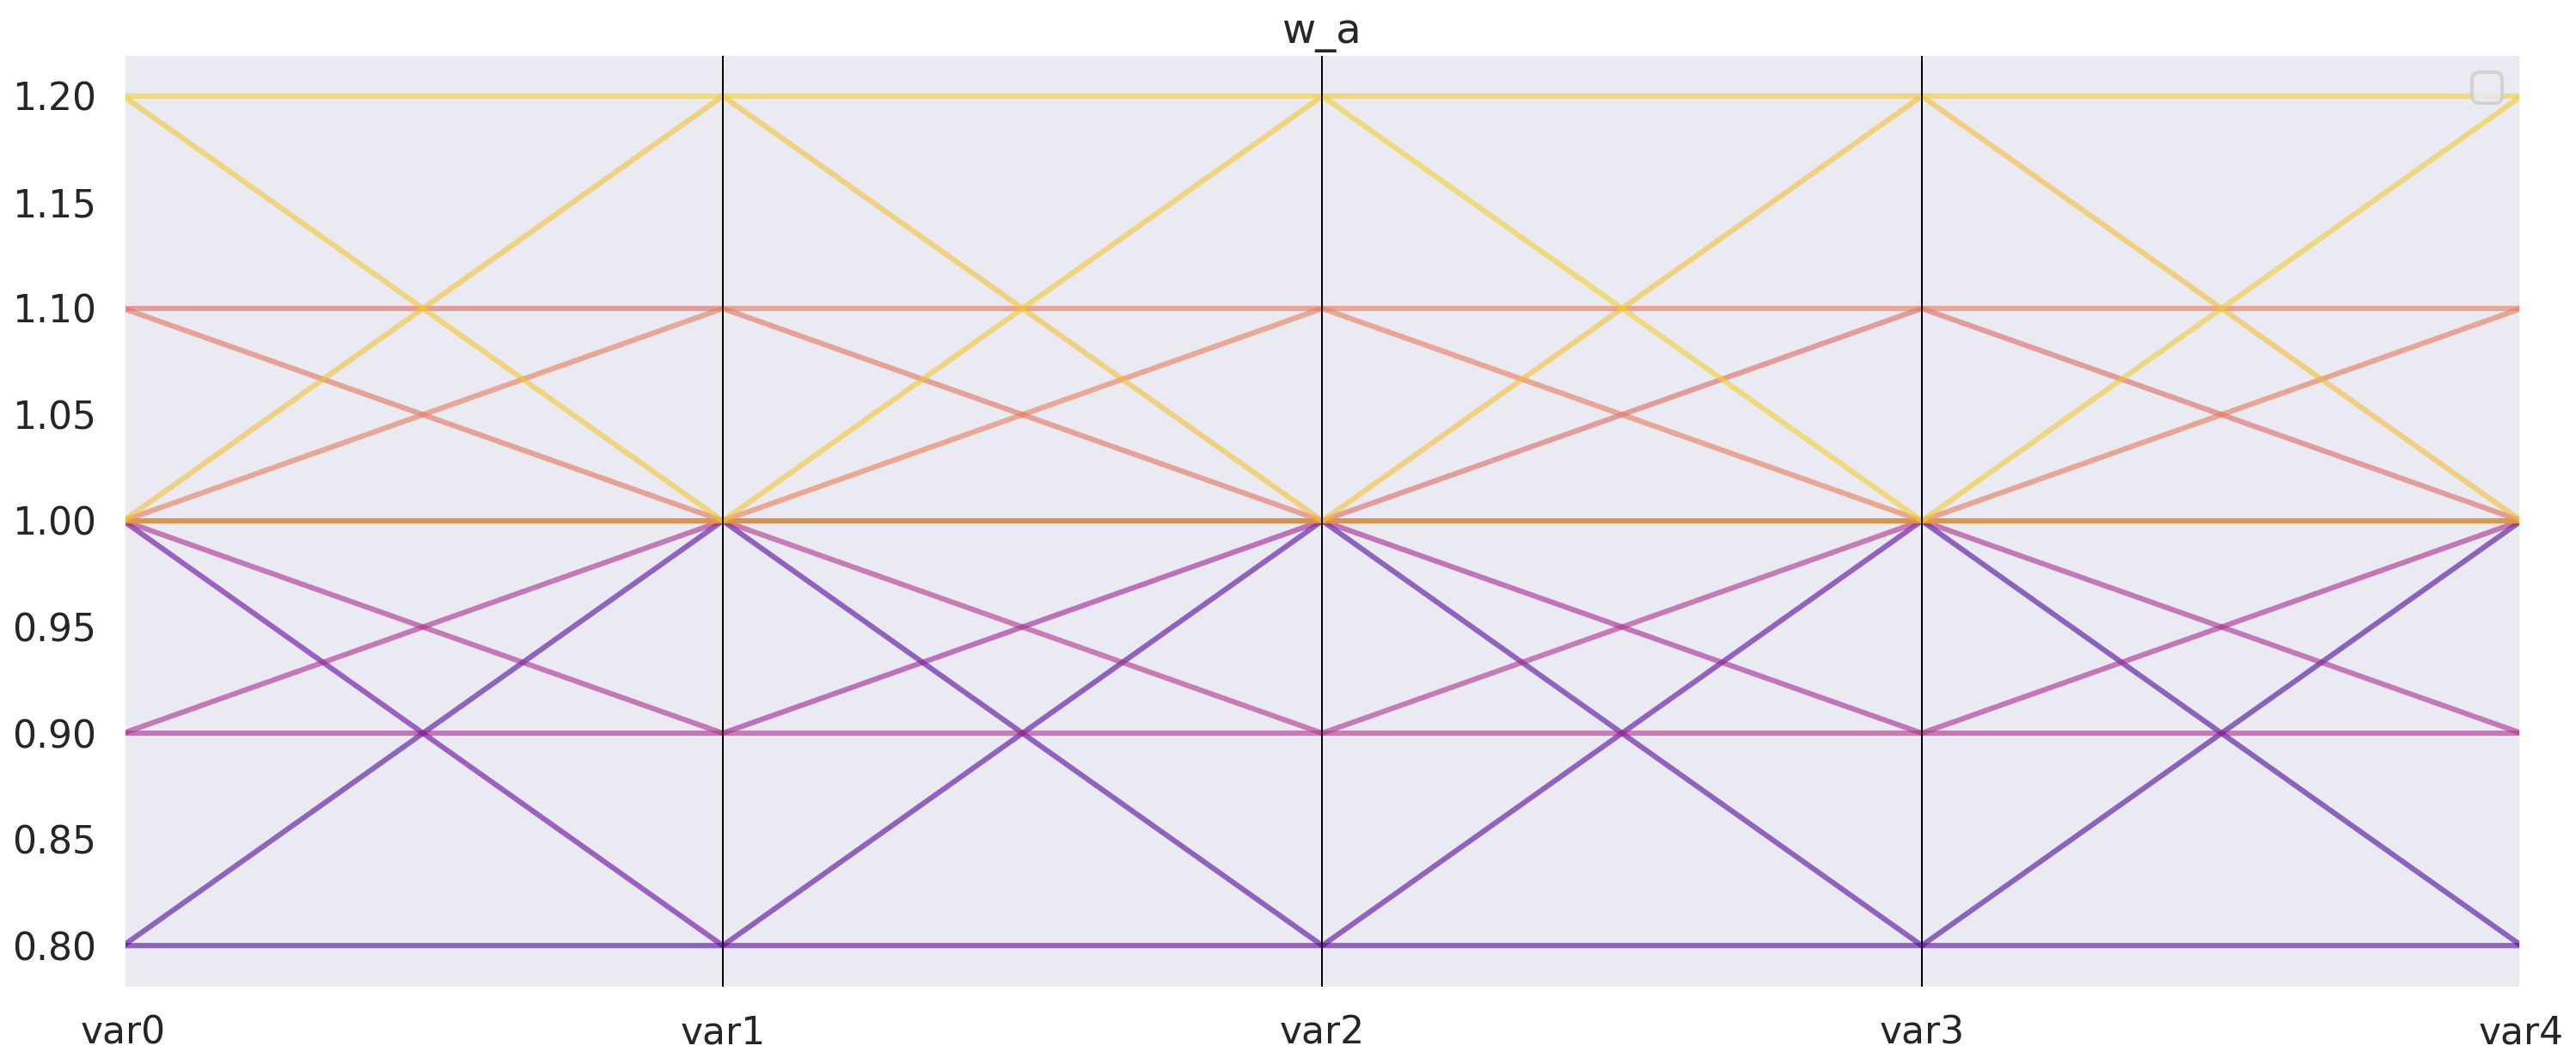

In [122]:
plt.figure()
plt.title('w_a')
ax = pd.plotting.parallel_coordinates(df1, 
 'w_0', colormap=plt.get_cmap('plasma'), 
 linewidth=3, alpha=0.1)
plt.legend([])


